# Feature Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import *
import zipfile
from zipfile import ZipFile

from matplotlib.pylab import rcParams
import seaborn as sns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [2]:
df_knn_imputed_uniform_3 = pd.read_csv('df_knn_imputed_uniform_3.csv')
df_knn_imputed_uniform_5 = pd.read_csv('df_knn_imputed_uniform_5.csv')
df_knn_imputed_uniform_7 = pd.read_csv('df_knn_imputed_uniform_7.csv')
df_knn_imputed_uniform_9 = pd.read_csv('df_knn_imputed_uniform_9.csv')
df_knn_imputed_uniform_11 = pd.read_csv('df_knn_imputed_uniform_11.csv')
df_mean_imputed = pd.read_csv('df_mean_imputed.csv')

In [3]:
df_knn_imputed_uniform_3.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

# Using heatmap we can Correlates between different predictors for KNN-3 Imputed datasets.

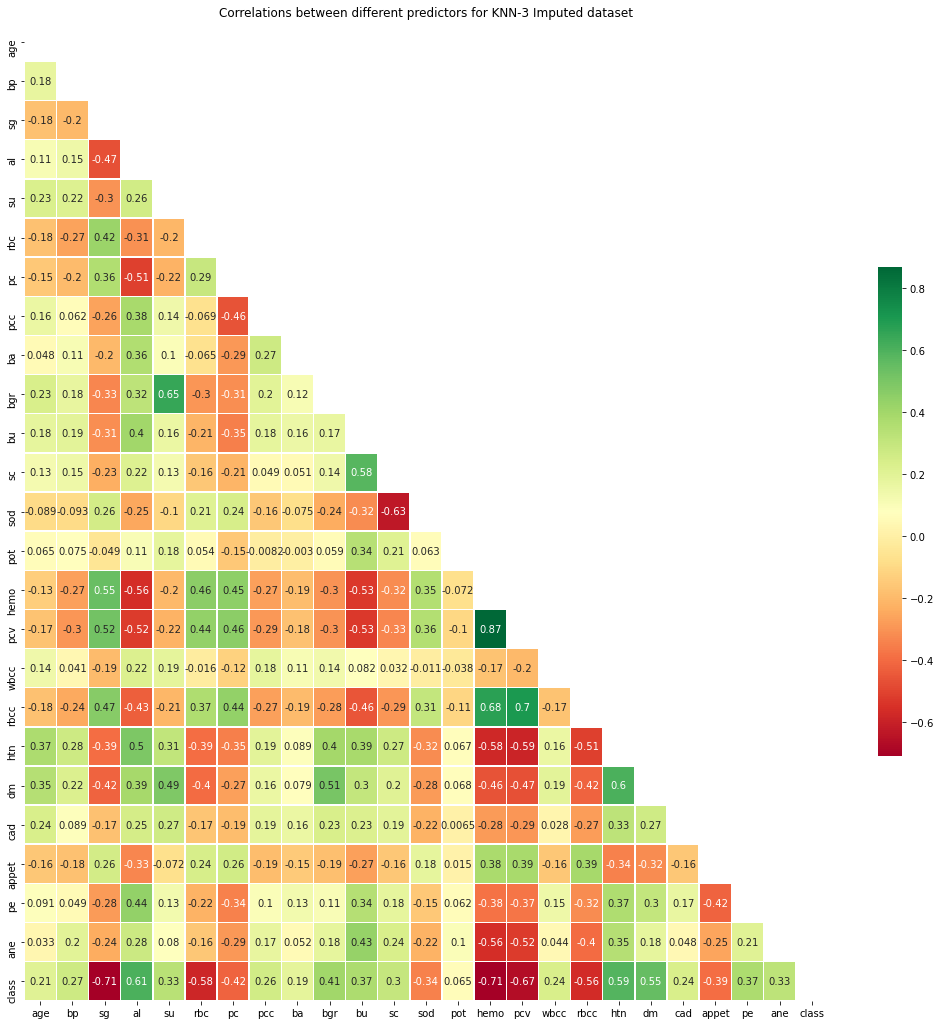

In [4]:
corr_df = df_knn_imputed_uniform_3.corr()
mask = np.zeros_like(corr_df, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True
    
f, ax = plt.subplots(figsize=(18, 18))
    
sns.heatmap(corr_df, mask=mask,annot = True, linewidths=.5, cmap = 'RdYlGn',cbar_kws={"shrink": .5});
#  vmax=.3, center=0,square=True,
plt.title('Correlations between different predictors for KNN-3 Imputed dataset')
plt.show()

In [5]:
def contributor(x):
    if(x==0):
        dataset = df_knn_imputed_uniform_3
    elif(x==1):
        dataset = df_knn_imputed_uniform_5
    elif(x==2):
        dataset = df_knn_imputed_uniform_7
    elif(x==3):
        dataset = df_knn_imputed_uniform_9
    elif(x==4):
        dataset = df_knn_imputed_uniform_11
    else:
        dataset = df_mean_imputed
        
    df_train,df_test = train_test_split(dataset,train_size=0.75)
    x_train=df_train.iloc[:,:24]
    y_train=df_train['class']
    scaler.fit(x_train)
    x_train_sc = scaler.transform(x_train)
    x_test=df_test.iloc[:,:24]
    y_test=df_test['class']
    scaler.fit(x_test)
    x_test_sc=scaler.transform(x_test)
        
    rfc = RandomForestClassifier(n_estimators=100,random_state=0)
    rfc.fit(x_train, y_train)

    feature_list = list(x_train.columns)
    importances = list(rfc.feature_importances_)
    feature_importances = [(x_train, round(importance, 2)) for x_train, importance in zip(feature_list, importances)]
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
    print('\n\n')
        
        
        

In [6]:
for i in range(6):
    
    contributor(i)
    
    

Variable: hemo                 Importance: 0.2
Variable: al                   Importance: 0.16
Variable: sg                   Importance: 0.13
Variable: sc                   Importance: 0.11
Variable: pcv                  Importance: 0.09
Variable: rbc                  Importance: 0.06
Variable: bgr                  Importance: 0.04
Variable: bu                   Importance: 0.04
Variable: rbcc                 Importance: 0.04
Variable: htn                  Importance: 0.03
Variable: dm                   Importance: 0.02
Variable: age                  Importance: 0.01
Variable: bp                   Importance: 0.01
Variable: su                   Importance: 0.01
Variable: pc                   Importance: 0.01
Variable: sod                  Importance: 0.01
Variable: pot                  Importance: 0.01
Variable: wbcc                 Importance: 0.01
Variable: appet                Importance: 0.01
Variable: pe                   Importance: 0.01
Variable: pcc                  Importance

We Can see the variable which has importance >0.01 from all the Imputed datasets are same.
So,Now we should drop all the less Important variable which is 0.01 or less **(age,su,pc,sod,pot,wbcc,pcc,ba,cad,ane)**

In [9]:
def drop_column(x):
    res={}
    if(x==0):
        dataset = df_knn_imputed_uniform_3
        dataset.drop(['pcc' ,'ba' , 'cad' , 'ane'],axis=1,inplace=True)
    elif(x==1):
        dataset = df_knn_imputed_uniform_5
        dataset.drop(['pcc' ,'ba' , 'cad' , 'ane','pot' ,'appet'],axis=1,inplace=True)
    elif(x==2):
        dataset = df_knn_imputed_uniform_7
        dataset.drop(['pcc' ,'ba' , 'cad' , 'ane','pot'],axis=1,inplace=True)
    elif(x==3):
        dataset = df_knn_imputed_uniform_9
        dataset.drop(['pcc' ,'ba' , 'cad' , 'ane'],axis=1,inplace=True)
    elif(x==4):
        dataset = df_knn_imputed_uniform_11
        dataset.drop(['pcc' ,'ba' , 'cad' , 'ane','appet'],axis=1,inplace=True)
    else:
        dataset = df_mean_imputed
        dataset.drop(['pcc' ,'ba' , 'cad' , 'ane','pot','pe'],axis=1,inplace=True)
    


In [10]:
for i in range(6):
    drop_column(i)

Now we can check for each datasets that if all the less impotant variables are removed or not.

In [11]:
df_knn_imputed_uniform_3.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'bgr', 'bu', 'sc', 'sod',
       'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'appet', 'pe',
       'class'],
      dtype='object')

In [12]:
df_knn_imputed_uniform_5.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'bgr', 'bu', 'sc', 'sod',
       'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'pe', 'class'],
      dtype='object')

In [13]:
df_knn_imputed_uniform_7.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'bgr', 'bu', 'sc', 'sod',
       'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'appet', 'pe', 'class'],
      dtype='object')

In [14]:
df_knn_imputed_uniform_9.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'bgr', 'bu', 'sc', 'sod',
       'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'appet', 'pe',
       'class'],
      dtype='object')

In [15]:
df_knn_imputed_uniform_11.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'bgr', 'bu', 'sc', 'sod',
       'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'pe', 'class'],
      dtype='object')

In [16]:
df_mean_imputed.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'bgr', 'bu', 'sc', 'sod',
       'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'appet', 'class'],
      dtype='object')

SImilarly, we can check for all other datasets.

In [17]:
df_knn_imputed_uniform_3.to_csv("df_knn_imputed_uniform_3.csv",index=False)
df_knn_imputed_uniform_5.to_csv("df_knn_imputed_uniform_5.csv",index=False)
df_knn_imputed_uniform_7.to_csv("df_knn_imputed_uniform_7.csv",index=False)
df_knn_imputed_uniform_9.to_csv("df_knn_imputed_uniform_9.csv",index=False)
df_knn_imputed_uniform_11.to_csv("df_knn_imputed_uniform_11.csv",index=False)
df_mean_imputed.to_csv("df_mean_imputed.csv",index=False)